In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2017-01-05"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2017_1q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-01-05   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6906     ÎÇ®Íµ¨  14850     ÎÇ®Íµ¨   
1   2017-01-05     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5823     ÎÇ®Íµ¨   6250     ÎÇ®Íµ¨   
2   2017-01-05    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4700     ÎÇ®Íµ¨   4746     ÎÇ®Íµ¨   
3   2017-01-05     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3290     ÎÇ®Íµ¨   4980     ÎÇ®Íµ¨   
4   2017-01-05    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4980     ÎÇ®Íµ¨   5228     ÎÇ®Íµ¨   
5   2017-01-05     ÎåÄÌåå                      1.0„éè   4250     ÎÇ®Íµ¨   5190     ÎÇ®Íµ¨   
6   2017-01-05   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8950     ÎÇ®Íµ¨   9350     ÎÇ®Íµ¨   
7   2017-01-05     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365     ÎÇ®Íµ¨   5300     ÎÇ®Íµ¨   
8   2017-01-05     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
9   2017-01-05     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1320     ÎÇ®Íµ¨   1330     ÎÇ®Íµ¨   
10  2017-01-05      Î¨¥                   2.0„éè 1Í∞ú   2680     ÎÇ®Íµ¨   5085     ÎÇ®Íµ¨   
11  2017-01-05    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   2980     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
12  2017-01-05     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3270     ÎÇ®Íµ¨   3300     ÎÇ®Íµ¨   
13  2017-01-05      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  13500     ÎÇ®Íµ¨  19567     ÎÇ®Íµ¨   
14  2017-01-05     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2054     ÎÇ®Íµ¨   2980     ÎÇ®Íµ¨   
15  2017-01-05  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490     ÎÇ®Íµ¨   6562     ÎÇ®Íµ¨   
16  2017-01-05   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500     ÎÇ®Íµ¨  13500     ÎÇ®Íµ¨   
17  2017-01-05     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12500     ÎÇ®Íµ¨  13155     ÎÇ®Íµ¨   
18  2017-01-05    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     ÎÇ®Íµ¨   2450     ÎÇ®Íµ¨   
19  2017-01-05     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630     ÎÇ®Íµ¨   1630     ÎÇ®Íµ¨   
20  2017-01-05     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1130     ÎÇ®Íµ¨   1380     ÎÇ®Íµ¨   
21  2017-01-05    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  42450     ÎÇ®Íµ¨  42500     ÎÇ®Íµ¨   
22  2017-01-05    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5950     ÎÇ®Íµ¨   7140     ÎÇ®Íµ¨   
23  2017-01-05      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  35800     ÎÇ®Íµ¨  35900     ÎÇ®Íµ¨   
24  2017-01-05     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1804     ÎÇ®Íµ¨   2350     ÎÇ®Íµ¨   
25  2017-01-05     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     ÎÇ®Íµ¨    730     ÎÇ®Íµ¨   
26  2017-01-05    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7200     ÎÇ®Íµ¨   7250     ÎÇ®Íµ¨   
27  2017-01-05   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2580     ÎÇ®Íµ¨   2980     ÎÇ®Íµ¨   
28  2017-01-05     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2450     ÎÇ®Íµ¨   2990     ÎÇ®Íµ¨   
29  2017-01-05    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11793     ÎÇ®Íµ¨  23333     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    7944  115.03%  10,878  
1     427    7.33%   6,037  
2      46    0.98%   4,723  
3    1690   51.37%   4,135  
4     248    4.98%   5,104  
5     940   22.12%   4,720  
6     400    4.47%   9,150  
7     935   21.42%   4,833  
8       0     0.0%     676  
9      10    0.76%   1,325  
10   2405   89.74%   3,883  
11    310    10.4%   3,135  
12     30    0.92%   3,285  
13   6067   44.94%  16,534  
14    926   45.08%   2,517  
15     72    1.11%   6,526  
16      0     0.0%  13,500  
17    655    5.24%  12,828  
18    134    5.79%   2,383  
19      0     0.0%   1,630  
20    250   22.12%   1,255  
21     50    0.12%  42,475  
22   1190    20.0%   6,545  
23    100    0.28%  35,850  
24    546   30.27%   2,077

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2017-04-06"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2017_2q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-04-06   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     ÎÇ®Íµ¨  14850     ÎÇ®Íµ¨   
1   2017-04-06     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5770     ÎÇ®Íµ¨   5818     ÎÇ®Íµ¨   
2   2017-04-06    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3921     ÎÇ®Íµ¨   7779     ÎÇ®Íµ¨   
3   2017-04-06     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2990     ÎÇ®Íµ¨   3380     ÎÇ®Íµ¨   
4   2017-04-06    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5180     ÎÇ®Íµ¨   6657     ÎÇ®Íµ¨   
5   2017-04-06     ÎåÄÌåå                      1.0„éè   4685     ÎÇ®Íµ¨   5085     ÎÇ®Íµ¨   
6   2017-04-06   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9950     ÎÇ®Íµ¨  12800     ÎÇ®Íµ¨   
7   2017-04-06     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365     ÎÇ®Íµ¨   5300     ÎÇ®Íµ¨   
8   2017-04-06     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
9   2017-04-06     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400     ÎÇ®Íµ¨   1410     ÎÇ®Íµ¨   
10  2017-04-06      Î¨¥                   2.0„éè 1Í∞ú   3050     ÎÇ®Íµ¨   3600     ÎÇ®Íµ¨   
11  2017-04-06    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   2920     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
12  2017-04-06     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   6950     ÎÇ®Íµ¨   8430     ÎÇ®Íµ¨   
13  2017-04-06      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  21566     ÎÇ®Íµ¨  32952     ÎÇ®Íµ¨   
14  2017-04-06     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1674     ÎÇ®Íµ¨   2980     ÎÇ®Íµ¨   
15  2017-04-06  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490     ÎÇ®Íµ¨   6562     ÎÇ®Íµ¨   
16  2017-04-06   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  10900     ÎÇ®Íµ¨  13500     ÎÇ®Íµ¨   
17  2017-04-06     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  13249     ÎÇ®Íµ¨  16022     ÎÇ®Íµ¨   
18  2017-04-06    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     ÎÇ®Íµ¨   2450     ÎÇ®Íµ¨   
19  2017-04-06     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     ÎÇ®Íµ¨   1580     ÎÇ®Íµ¨   
20  2017-04-06     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1190     ÎÇ®Íµ¨   
21  2017-04-06    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  42450     ÎÇ®Íµ¨  49000     ÎÇ®Íµ¨   
22  2017-04-06    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4420     ÎÇ®Íµ¨   5990     ÎÇ®Íµ¨   
23  2017-04-06      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  35800     ÎÇ®Íµ¨  35900     ÎÇ®Íµ¨   
24  2017-04-06     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2450     ÎÇ®Íµ¨   3055     ÎÇ®Íµ¨   
25  2017-04-06     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     ÎÇ®Íµ¨    730     ÎÇ®Íµ¨   
26  2017-04-06    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4990     ÎÇ®Íµ¨   5780     ÎÇ®Íµ¨   
27  2017-04-06   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   2990     ÎÇ®Íµ¨   
28  2017-04-06     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2380     ÎÇ®Íµ¨   2990     ÎÇ®Íµ¨   
29  2017-04-06    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15430     ÎÇ®Íµ¨  18137     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    7425  100.0%  11,138  
1      48   0.83%   5,794  
2    3858  98.39%   5,850  
3     390  13.04%   3,185  
4    1477  28.51%   5,919  
5     400   8.54%   4,885  
6    2850  28.64%  11,375  
7     935  21.42%   4,833  
8       0    0.0%     676  
9      10   0.71%   1,405  
10    550  18.03%   3,325  
11    370  12.67%   3,105  
12   1480  21.29%   7,690  
13  11386   52.8%  27,259  
14   1306  78.02%   2,327  
15     72   1.11%   6,526  
16   2600  23.85%  12,200  
17   2773  20.93%  14,636  
18    134   5.79%   2,383  
19      0    0.0%   1,580  
20      0    0.0%   1,190  
21   6550  15.43%  45,725  
22   1570  35.52%   5,205  
23    100   0.28%  35,850  
24    605  24.69%   2,753  
25      0    0.0%     7

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2017-07-06"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2017_3q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-07-06   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8175     ÎÇ®Íµ¨  16425     ÎÇ®Íµ¨   
1   2017-07-06     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2017-07-06    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4656     ÎÇ®Íµ¨   5057     ÎÇ®Íµ¨   
3   2017-07-06     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3190     ÎÇ®Íµ¨   3780     ÎÇ®Íµ¨   
4   2017-07-06    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5490     ÎÇ®Íµ¨   6875     ÎÇ®Íµ¨   
5   2017-07-06     ÎåÄÌåå                      1.0„éè   2828     ÎÇ®Íµ¨   3338     ÎÇ®Íµ¨   
6   2017-07-06   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9450     ÎÇ®Íµ¨  17950     ÎÇ®Íµ¨   
7   2017-07-06     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365     ÎÇ®Íµ¨   5380     ÎÇ®Íµ¨   
8   2017-07-06     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
9   2017-07-06     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400     ÎÇ®Íµ¨   1410     ÎÇ®Íµ¨   
10  2017-07-06      Î¨¥                   2.0„éè 1Í∞ú   1480     ÎÇ®Íµ¨   2316     ÎÇ®Íµ¨   
11  2017-07-06    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
12  2017-07-06     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8857     ÎÇ®Íµ¨  10750     ÎÇ®Íµ¨   
13  2017-07-06      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  30857     ÎÇ®Íµ¨  34493     ÎÇ®Íµ¨   
14  2017-07-06     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1560     ÎÇ®Íµ¨   1680     ÎÇ®Íµ¨   
15  2017-07-06  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6475     ÎÇ®Íµ¨   6490     ÎÇ®Íµ¨   
16  2017-07-06   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  10500     ÎÇ®Íµ¨  10500     ÎÇ®Íµ¨   
17  2017-07-06     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12287     ÎÇ®Íµ¨  15228     ÎÇ®Íµ¨   
18  2017-07-06    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     ÎÇ®Íµ¨   2450     ÎÇ®Íµ¨   
19  2017-07-06     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     ÎÇ®Íµ¨   1580     ÎÇ®Íµ¨   
20  2017-07-06     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1190     ÎÇ®Íµ¨   
21  2017-07-06    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44500     ÎÇ®Íµ¨  49000     ÎÇ®Íµ¨   
22  2017-07-06    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950     ÎÇ®Íµ¨   7188     ÎÇ®Íµ¨   
23  2017-07-06      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  32800     ÎÇ®Íµ¨  35900     ÎÇ®Íµ¨   
24  2017-07-06     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1850     ÎÇ®Íµ¨   2073     ÎÇ®Íµ¨   
25  2017-07-06     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     ÎÇ®Íµ¨    730     ÎÇ®Íµ¨   
26  2017-07-06    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4990     ÎÇ®Íµ¨   5980     ÎÇ®Íµ¨   
27  2017-07-06   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
28  2017-07-06     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2980     ÎÇ®Íµ¨   2990     ÎÇ®Íµ¨   
29  2017-07-06    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15200     ÎÇ®Íµ¨  18137     ÎÇ®Íµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   8250  100.92%  12,300  
1      0     0.0%   6,300  
2    401    8.61%   4,857  
3    590    18.5%   3,485  
4   1385   25.23%   6,183  
5    510   18.03%   3,083  
6   8500   89.95%  13,700  
7   1015   23.25%   4,873  
8      0     0.0%     676  
9     10    0.71%   1,405  
10   836   56.49%   1,898  
11   210    6.82%   3,185  
12  1893   21.37%   9,804  
13  3636   11.78%  32,675  
14   120    7.69%   1,620  
15    15    0.23%   6,483  
16     0     0.0%  10,500  
17  2941   23.94%  13,758  
18   134    5.79%   2,383  
19     0     0.0%   1,580  
20     0     0.0%   1,190  
21  4500   10.11%  46,750  
22   238    3.42%   7,069  
23  3100    9.45%  34,350  
24   223   12.05%   1,962  
25     0     0.0%     7

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2017-10-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2017_4q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-10-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8175     ÎÇ®Íµ¨  16135     ÎÇ®Íµ¨   
1   2017-10-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2017-10-12    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3500     ÎÇ®Íµ¨   3694     ÎÇ®Íµ¨   
3   2017-10-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2680     ÎÇ®Íµ¨   2880     ÎÇ®Íµ¨   
4   2017-10-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4980     ÎÇ®Íµ¨   5290     ÎÇ®Íµ¨   
5   2017-10-12     ÎåÄÌåå                      1.0„éè   3412     ÎÇ®Íµ¨   5190     ÎÇ®Íµ¨   
6   2017-10-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  10450     ÎÇ®Íµ¨  16900     ÎÇ®Íµ¨   
7   2017-10-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365     ÎÇ®Íµ¨   5380     ÎÇ®Íµ¨   
8   2017-10-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
9   2017-10-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400     ÎÇ®Íµ¨   1410     ÎÇ®Íµ¨   
10  2017-10-12      Î¨¥                   2.0„éè 1Í∞ú   2240     ÎÇ®Íµ¨   3436     ÎÇ®Íµ¨   
11  2017-10-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3090     ÎÇ®Íµ¨   
12  2017-10-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3900     ÎÇ®Íµ¨   9900     ÎÇ®Íµ¨   
13  2017-10-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  23600     ÎÇ®Íµ¨  23702     ÎÇ®Íµ¨   
14  2017-10-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   5149     ÎÇ®Íµ¨   5306     ÎÇ®Íµ¨   
15  2017-10-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490     ÎÇ®Íµ¨   6562     ÎÇ®Íµ¨   
16  2017-10-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500     ÎÇ®Íµ¨  13500     ÎÇ®Íµ¨   
17  2017-10-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  10745     ÎÇ®Íµ¨  13213     ÎÇ®Íµ¨   
18  2017-10-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2450     ÎÇ®Íµ¨   3300     ÎÇ®Íµ¨   
19  2017-10-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     ÎÇ®Íµ¨   1630     ÎÇ®Íµ¨   
20  2017-10-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1190     ÎÇ®Íµ¨   
21  2017-10-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  49000     ÎÇ®Íµ¨  49500     ÎÇ®Íµ¨   
22  2017-10-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950     ÎÇ®Íµ¨   7188     ÎÇ®Íµ¨   
23  2017-10-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39900     ÎÇ®Íµ¨  43900     ÎÇ®Íµ¨   
24  2017-10-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1988     ÎÇ®Íµ¨   2217     ÎÇ®Íµ¨   
25  2017-10-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     ÎÇ®Íµ¨    730     ÎÇ®Íµ¨   
26  2017-10-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4990     ÎÇ®Íµ¨   5980     ÎÇ®Íµ¨   
27  2017-10-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
28  2017-10-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2980     ÎÇ®Íµ¨   2990     ÎÇ®Íµ¨   
29  2017-10-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  19500     ÎÇ®Íµ¨  24785     ÎÇ®Íµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   7960   97.37%  12,155  
1      0     0.0%   6,300  
2    194    5.54%   3,597  
3    200    7.46%   2,780  
4    310    6.22%   5,135  
5   1778   52.11%   4,301  
6   6450   61.72%  13,675  
7   1015   23.25%   4,873  
8      0     0.0%     676  
9     10    0.71%   1,405  
10  1196   53.39%   2,838  
11    10    0.32%   3,085  
12  6000  153.85%   6,900  
13   102    0.43%  23,651  
14   157    3.05%   5,228  
15    72    1.11%   6,526  
16     0     0.0%  13,500  
17  2468   22.97%  11,979  
18   850   34.69%   2,875  
19    50    3.16%   1,605  
20     0     0.0%   1,190  
21   500    1.02%  49,250  
22   238    3.42%   7,069  
23  4000   10.03%  41,900  
24   229   11.52%   2,103  
25     0     0.0%     7

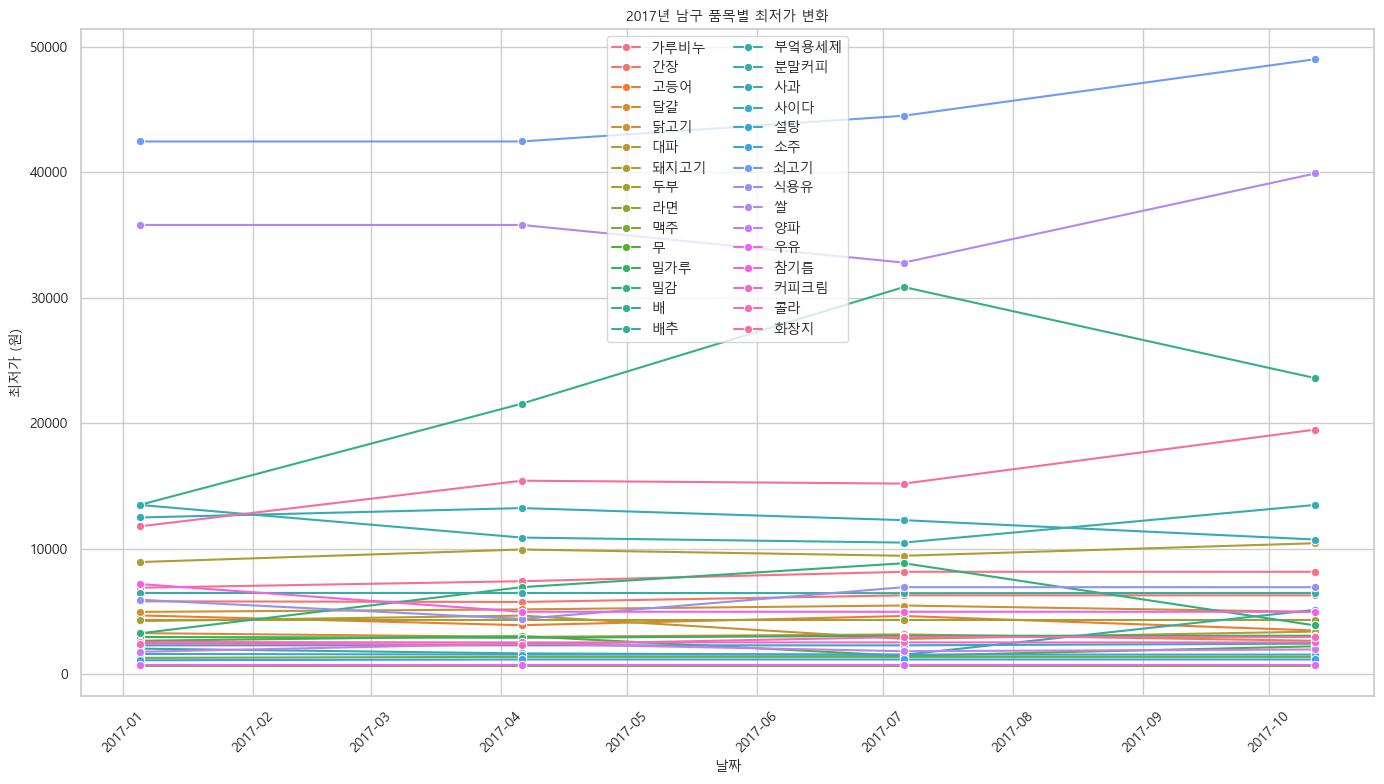

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎÇ®Íµ¨2017_1q.csv")
q2 = pd.read_csv("ÎÇ®Íµ¨2017_2q.csv")
q3 = pd.read_csv("ÎÇ®Íµ¨2017_3q.csv")
q4 = pd.read_csv("ÎÇ®Íµ¨2017_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2017ÎÖÑ ÎÇ®Íµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎÇ®Íµ¨2017_min.csv", index=False, encoding="utf-8-sig")

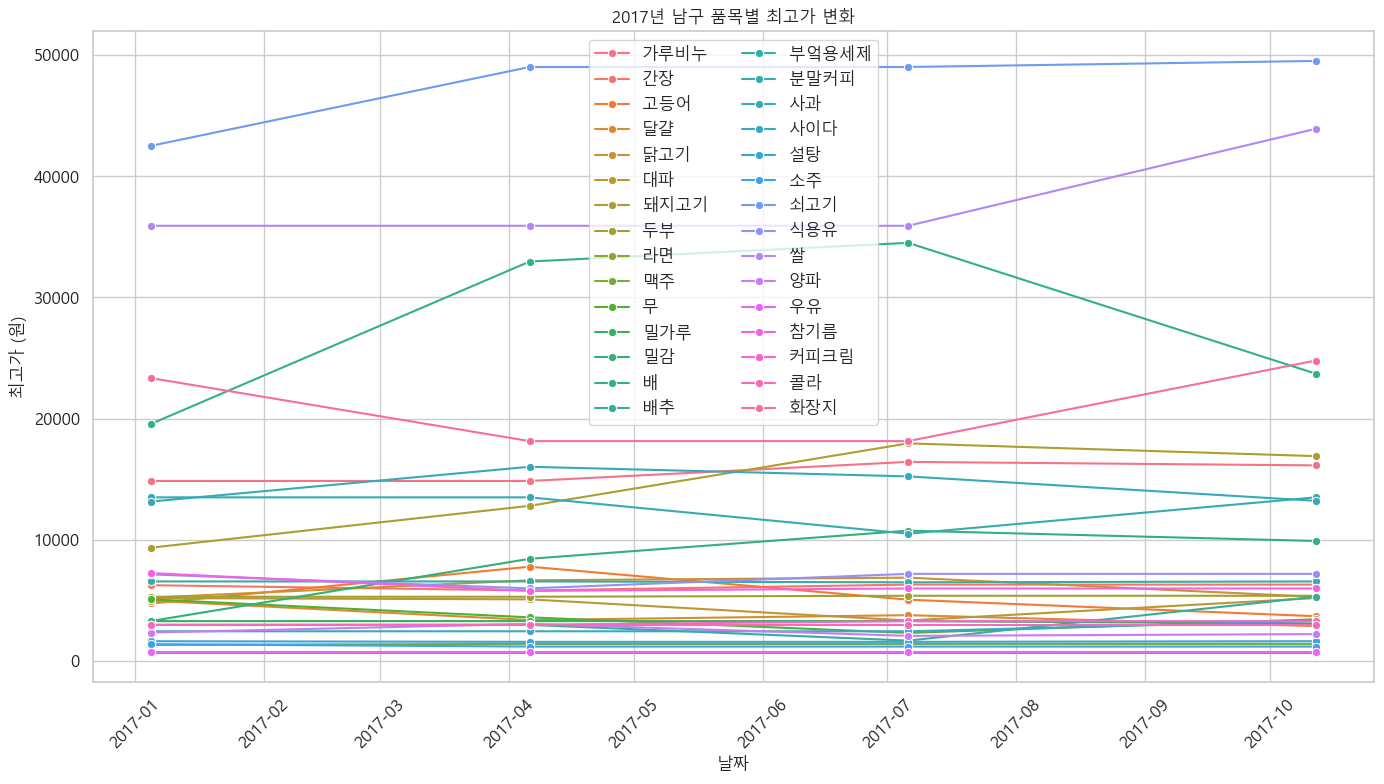

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎÇ®Íµ¨2017_1q.csv")
q2 = pd.read_csv("ÎÇ®Íµ¨2017_2q.csv")
q3 = pd.read_csv("ÎÇ®Íµ¨2017_3q.csv")
q4 = pd.read_csv("ÎÇ®Íµ¨2017_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2017ÎÖÑ ÎÇ®Íµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎÇ®Íµ¨2017_max.csv", index=False, encoding="utf-8-sig")